In [1]:
import os
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Concatenating files
df_lst = []
for f in os.listdir('../data'):
    temp = pd.read_csv('../data/' + f)
    df_lst.append(temp)
df = pd.concat(df_lst, ignore_index=True)

C:\Users\junsc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (53,56) have mixed types.Specify dtype option on import or set low_memory=False.

C:\Users\junsc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (53) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
# Checking shape
df.shape

(583315, 120)

In [4]:
# Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583315 entries, 0 to 583314
Columns: 120 entries, Week Ending to Number of Staff and/or Personnel with Confirmed Coinfection with Influenza and COVID-19
dtypes: float64(51), int64(1), object(68)
memory usage: 534.0+ MB


In [5]:
# Converting 'Week Ending' to datetime values
df['Week Ending'] = pd.to_datetime(df['Week Ending'])

# Dropping rows that did not meet quality assurance check
df = df.loc[df['Passed Quality Assurance Check'] == 'Y']

# Dropping rows where 'Geolocation' value is not provided
df = df.dropna(subset=['Geolocation'])

# Resetting index
df = df.reset_index(drop=True)

In [6]:
# Checking columns
list(df.columns)

['Week Ending',
 'Federal Provider Number',
 'Provider Name',
 'Provider Address',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Submitted Data',
 'Passed Quality Assurance Check',
 'Residents Weekly Admissions COVID-19',
 'Residents Total Admissions COVID-19',
 'Residents Weekly Confirmed COVID-19',
 'Residents Total Confirmed COVID-19',
 'Residents Weekly Suspected COVID-19',
 'Residents Total Suspected COVID-19',
 'Residents Weekly All Deaths',
 'Residents Total All Deaths',
 'Residents Weekly COVID-19 Deaths',
 'Residents Total COVID-19 Deaths',
 'Number of All Beds',
 'Total Number of Occupied Beds',
 'Resident Access to Testing in Facility',
 'Laboratory Type Is State Health Dept',
 'Laboratory Type Is Private Lab',
 'Laboratory Type Is Other',
 'Able to Test or Obtain Resources to Test All Current Residents Within Next 7 Days',
 'Reason for Not Testing Residents - Lack of PPE for Personnel ',
 'Reason for Not Testing Residents - Lack of Supplies',
 'Reason for Not

In [7]:
# List of all the binary columns
binary_columns = [
    'Resident Access to Testing in Facility',
    'Laboratory Type Is State Health Dept',
    'Laboratory Type Is Private Lab',
    'Laboratory Type Is Other',
    'Able to Test or Obtain Resources to Test All Current Residents Within Next 7 Days',
    'Reason for Not Testing Residents - Lack of PPE for Personnel ', 
    'Reason for Not Testing Residents - Lack of Supplies',
    'Reason for Not Testing Residents  - Lack of Access to Laboratory',
    'Reason for Not Testing Residents - Lack of Access to Trained Personnel ', 
    'Reason for Not Testing Residents  - Uncertainty About Reimbursement',
    'Reason for Not Testing Residents  - Other',
    'During Past Two Weeks Average Time to Receive Resident Test Results',
    'Has Facility Performed Resident Tests Since Last Report',
    'Tested Residents with New Signs or Symptoms',
    'Tested Asymptomatic Residents in a Unit or Section After a New Case',
    'Tested Asymptomatic Residents Facility-Wide After a New Case',
    'Tested Asymptomatic Residents Without Known Exposure as Surveillance',
    'Tested Another Subgroup of Residents',
    'Able to Test or Obtain Resources to Test All Staff and/or Personnel Within Next 7 Days',
    'Reason for Not Testing Staff and/or Personnel - Lack of PPE for Personnel ',
    'Reason for Not Testing Staff and/or Personnel - Lack of Supplies',
    'Reason for Not Testing Staff and/or Personnel - Lack of Access to Laboratory',
    'Reason for Not Testing Staff and/or Personnel  - Lack of Access to Trained Personnel ', 
    'Reason for Not Testing Staff and/or Personnel - Uncertainty About Reimbursement',
    'Reason for Not Testing Staff and/or Personnel - Other',
    'During Past Two Weeks Average Time to Receive Staff and/or Personnel Test Results',
    'Has Facility Performed Staff and/or Personnel Tests Since Last Report',
    'Tested Staff and/or Personnel with New Signs or Symptoms',
    'Tested Asymptomatic Staff and/or Personnel in a Unit or Section After a New Case',
    'Tested Asymptomatic Staff and/or Personnel Facility-Wide After a New Case',
    'Tested Asymptomatic Staff and/or Personnel Without Known Exposure as Surveillance',
    'Tested Another Subgroup of Staff and/or Personnel',
    'In-House Point-of-Care Test Machine',
    'Shortage of Clinical Staff',
    'Shortage of Aides',
    'Shortage of Other Staff',
    'Any Current Supply of N95 Masks',
    'One-Week Supply of N95 Masks',
    'Any Current Supply of Surgical Masks',
    'One-Week Supply of Surgical Masks',
    'Any Current Supply of Eye Protection',
    'One-Week Supply of Eye Protection',
    'Any Current Supply of Gowns',
    'One-Week Supply of Gowns',
    'Any Current Supply of Gloves',
    'One-Week Supply of Gloves',
    'Any Current Supply of Hand Sanitizer',
    'One-Week Supply of Hand Sanitizer',
    'Ventilator Dependent Unit',
    'Any Current Supply of Ventilator Supplies',
    'One-Week Supply of Ventilator Supplies',
    'Three or More Confirmed COVID-19 Cases This Week',
    'Initial Confirmed COVID-19 Case This Week',
    'Has Facility Performed Tests Since Last Report',
    'In-House Point-of-Care Test Machine',
    'Enough Supplies to Test All Staff and/or Personnel Using Point-of-Care Test Machine',
    'Shortage of Nursing Staff'
]

In [8]:
for col in binary_columns:
    df[col] = df[col].map({'N':0, 'Y':1})

# Basic EDA

In [9]:
# Descriptive statistics for numerical columns
df.describe().T

count          mean  \
Provider Zip Code                                   526093.0  50337.689692   
Residents Weekly Admissions COVID-19                526093.0      0.424554   
Residents Total Admissions COVID-19                 526093.0      7.721791   
Residents Weekly Confirmed COVID-19                 526093.0      1.103237   
Residents Total Confirmed COVID-19                  526093.0     20.150046   
...                                                      ...           ...   
Number of Staff and/or Personnel with a New Pos...  143452.0      0.014374   
Number of Staff and/or Personnel with a New Pos...  143448.0      0.024901   
Number of Staff and/or Personnel with New Influ...  149816.0      0.009378   
Number of Staff and/or Personnel with Acute Res...  142722.0      0.075076   
Number of Staff and/or Personnel with Confirmed...  149829.0      0.000981   

                                                             std     min  \
Provider Zip Code                                   26874.380891  1001.0   
Residents Weekly Admissions COVID-19                    1.967089     0.0   
Residents Total Admissions COVID-19                    22.453253     0.0   
Residents Weekly Confirmed COVID-19                     4.664723     0.0   
Residents Total Confirmed COVID-19                     28.874941     0.0   
...                                                          ...     ...   
Number of Staff and/or Personnel with a New Pos...      0.183653     0.0   
Number of Staff and/or Personnel with a New Pos...      0.222210     0.0   
Number of Staff and/or Personnel with New Influ...      0.469472     0.0   
Number of Staff and/or Personnel with Acute Res...      0.656024     0.0   
Number of Staff and/or Personnel with Confirmed...      0.047697     0.0   

                                                        25%      50%      75%  \
Provider Zip Code                                   30012.0  48624.0  72921.0   
Residents Weekly Admissions COVID-19                    0.0      0.0      0.0   
Residents Total Admissions COVID-19                     0.0      1.0      6.0   
Residents Weekly Confirmed COVID-19                     0.0      0.0      0.0   
Residents Total Confirmed COVID-19                      0.0      5.0     33.0   
...                                                     ...      ...      ...   
Number of Staff and/or Personnel with a New Pos...      0.0      0.0      0.0   
Number of Staff and/or Personnel with a New Pos...      0.0      0.0      0.0   
Number of Staff and/or Personnel with New Influ...      0.0      0.0      0.0   
Number of Staff and/or Personnel with Acute Res...      0.0      0.0      0.0   
Number of Staff and/or Personnel with Confirmed...      0.0      0.0      0.0   

                                                        max  
Provider Zip Code                                   99901.0  
Residents Weekly Admissions COVID-19                  212.0  
Residents Total Admissions COVID-19                   701.0  
Residents Weekly Confirmed COVID-19                   222.0  
Residents Total Confirmed COVID-19                    400.0  
...                                                     ...  
Number of Staff and/or Personnel with a New Pos...     21.0  
Number of Staff and/or Personnel with a New Pos...     21.0  
Number of Staff and/or Personnel with New Influ...    120.0  
Number of Staff and/or Personnel with Acute Res...    114.0  
Number of Staff and/or Personnel with Confirmed...      9.0  

[108 rows x 8 columns]

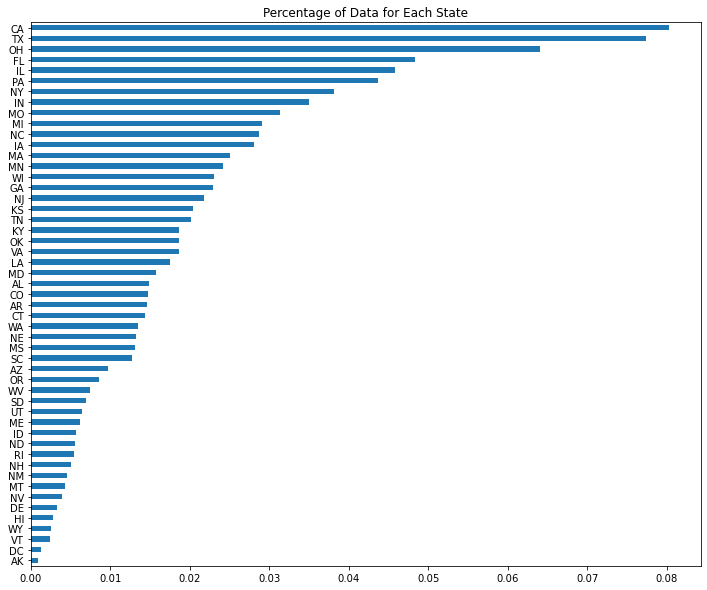

In [10]:
plt.figure(figsize=(12,10))
plt.title('Percentage of Data for Each State')
ax = df['Provider State'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='barh')
ax.invert_yaxis()

# Distribution Plots

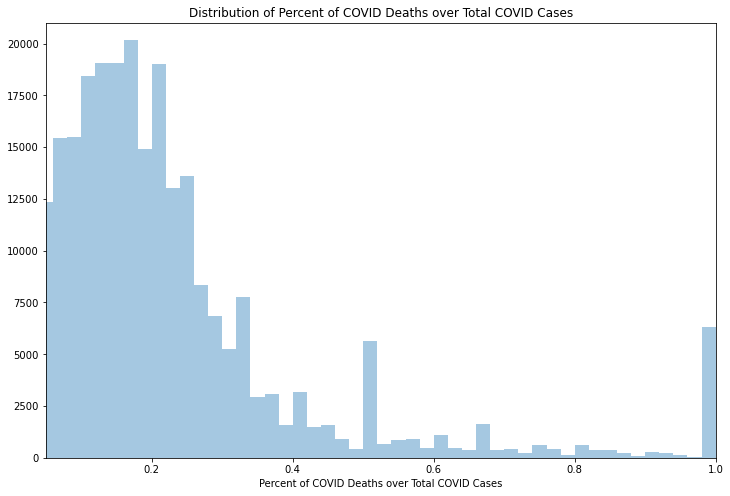

In [11]:
df['Percent of COVID Deaths over Total COVID Cases']\
= df['Residents Total COVID-19 Deaths']/(df['Residents Total COVID-19 Deaths']+df['Residents Total Confirmed COVID-19'])

plt.figure(figsize=(12, 8))
plt.title('Distribution of Percent of COVID Deaths over Total COVID Cases')
sns.distplot(df['Percent of COVID Deaths over Total COVID Cases'], kde=False, bins=50)
plt.axis([0.05, 1, 0, 21000]); # Zooming in for better Visualization

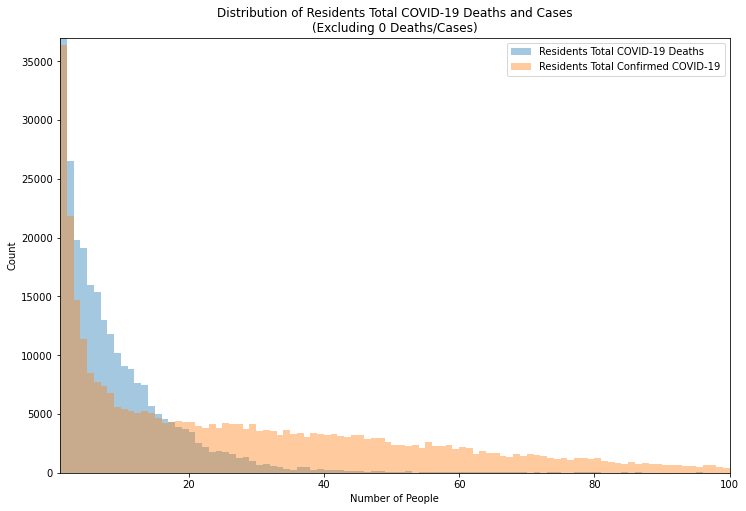

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Distribution of Residents Total COVID-19 Deaths and Cases\n(Excluding 0 Deaths/Cases)')

sns.distplot(
    df['Residents Total COVID-19 Deaths'],
    kde=False,
    label='Residents Total COVID-19 Deaths',
    bins=np.arange(df['Residents Total COVID-19 Deaths'].min(), df['Residents Total COVID-19 Deaths'].max() + 1, 1)
)

sns.distplot(
    df['Residents Total Confirmed COVID-19'],
    kde=False,
    label='Residents Total Confirmed COVID-19',
    bins=np.arange(df['Residents Total Confirmed COVID-19'].min(), df['Residents Total Confirmed COVID-19'].max() + 1, 1)
)

plt.legend()
plt.ylabel('Count')
plt.xlabel('Number of People')
plt.axis([1, 100, 0, 37000]); # Zooming in for better Visualization

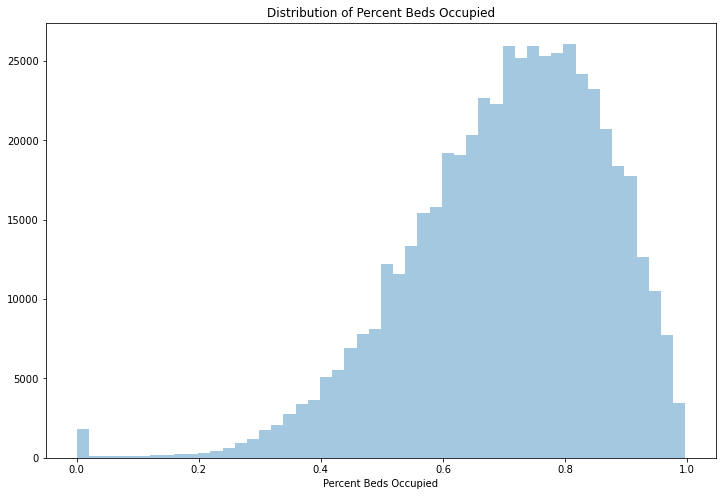

In [13]:
df['Percent Beds Occupied'] = df['Total Number of Occupied Beds']/df['Number of All Beds']

# When 'Number of All Beds' is 0 and 'Total Number of Occupied Beds' is above 0,
# We are diving by 0 and getting np.inf
# This is most likely the case of 100% occupancy so replace np.inf with 1
df['Percent Beds Occupied'] = df['Percent Beds Occupied'].replace(np.inf, 1)

plt.figure(figsize=(12, 8))
plt.title('Distribution of Percent Beds Occupied')
# Not including erroneous rows where 'Total Number of Occupied Beds' was higher than 'Number of All Beds'
sns.distplot(df.loc[df['Percent Beds Occupied'] < 1, 'Percent Beds Occupied'], kde=False);

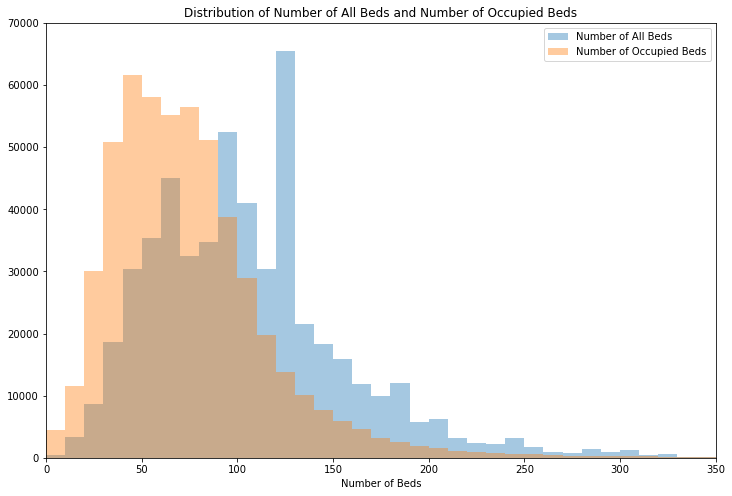

In [14]:
plt.figure(figsize=(12, 8))
plt.title('Distribution of Number of All Beds and Number of Occupied Beds')

sns.distplot(
    df['Number of All Beds'],
    kde=False,
    label='Number of All Beds',
    bins=np.arange(df['Number of All Beds'].min(), df['Number of All Beds'].max() + 10, 10)
)
sns.distplot(
    df['Total Number of Occupied Beds'],
    kde=False,
    label='Number of Occupied Beds',
    bins=np.arange(df['Total Number of Occupied Beds'].min(), df['Total Number of Occupied Beds'].max() + 10, 10),
)
plt.legend()
plt.xlabel('Number of Beds')

plt.axis([0, 350, 0, 70000]); # Zooming in for better Visualization

# Relationships between Selected Features

In [15]:
# Grouping by state
df_by_state = df.groupby(by=['Provider State']).sum()
# Resetting index
df_by_state = df_by_state.reset_index()

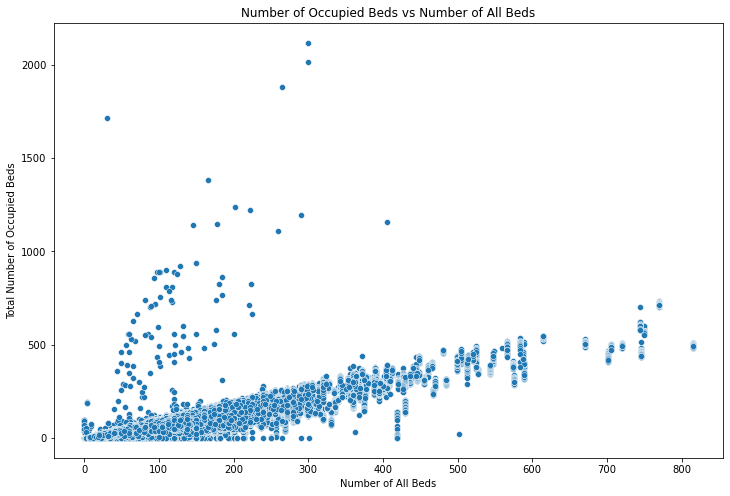

In [16]:
plt.figure(figsize=(12, 8))
plt.title('Number of Occupied Beds vs Number of All Beds')
sns.scatterplot(data=df, x='Number of All Beds', y='Total Number of Occupied Beds');

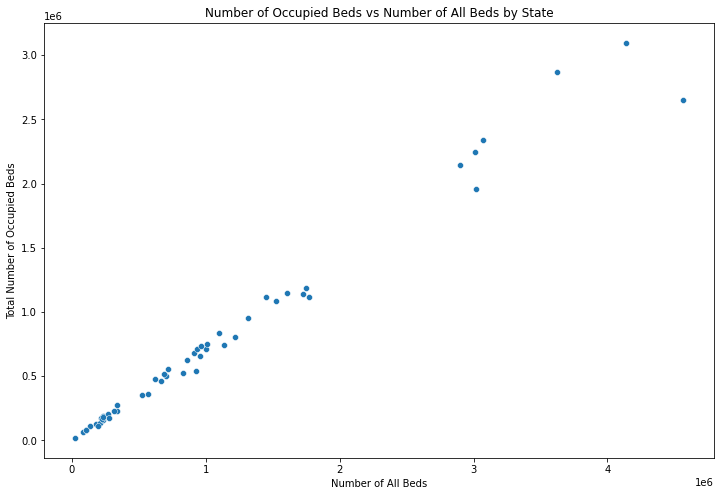

In [17]:
plt.figure(figsize=(12, 8))
plt.title('Number of Occupied Beds vs Number of All Beds by State')
sns.scatterplot(
    data=df_by_state,
    x='Number of All Beds',
    y='Total Number of Occupied Beds',
);

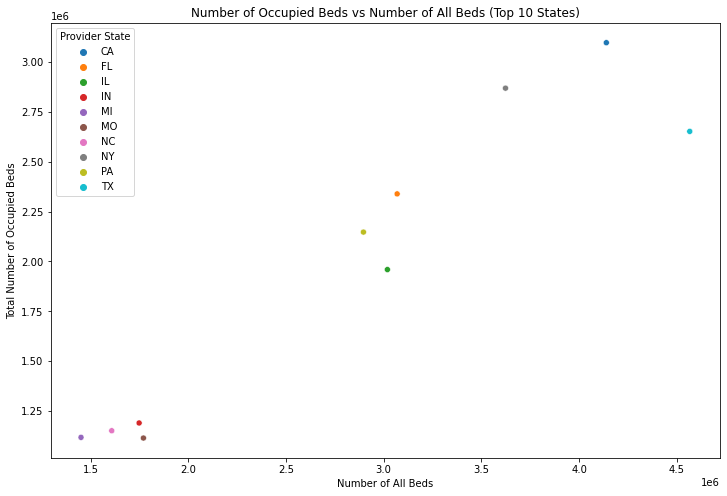

In [18]:
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
plt.figure(figsize=(12, 8))
plt.title('Number of Occupied Beds vs Number of All Beds (Top 10 States)')
sns.scatterplot(
    data=df_by_state.loc[df_by_state['Provider State'].isin(top_states)],
    x='Number of All Beds',
    y='Total Number of Occupied Beds',
    hue='Provider State'
);

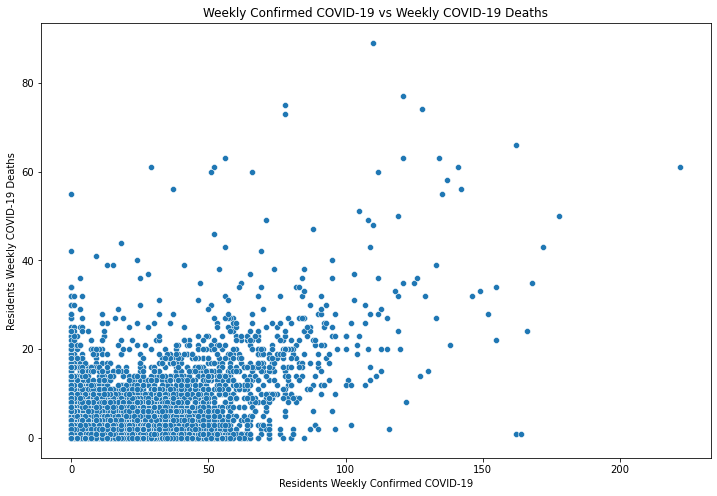

In [19]:
plt.figure(figsize=(12, 8))
plt.title('Weekly Confirmed COVID-19 vs Weekly COVID-19 Deaths')
sns.scatterplot(
    data=df,
    x='Residents Weekly Confirmed COVID-19',
    y='Residents Weekly COVID-19 Deaths'
);

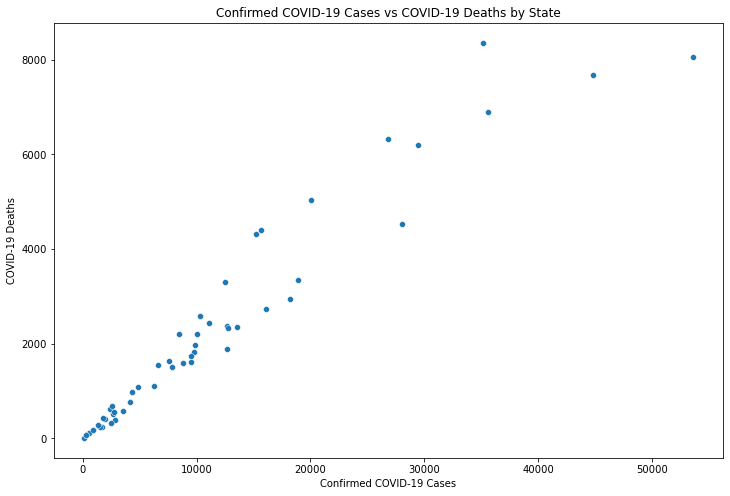

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Confirmed COVID-19 Cases vs COVID-19 Deaths by State')
plt.ylabel('COVID-19 Deaths')
plt.xlabel('Confirmed COVID-19 Cases')
sns.scatterplot(
    data=df_by_state,
    x='Residents Weekly Confirmed COVID-19',
    y='Residents Weekly COVID-19 Deaths',
);

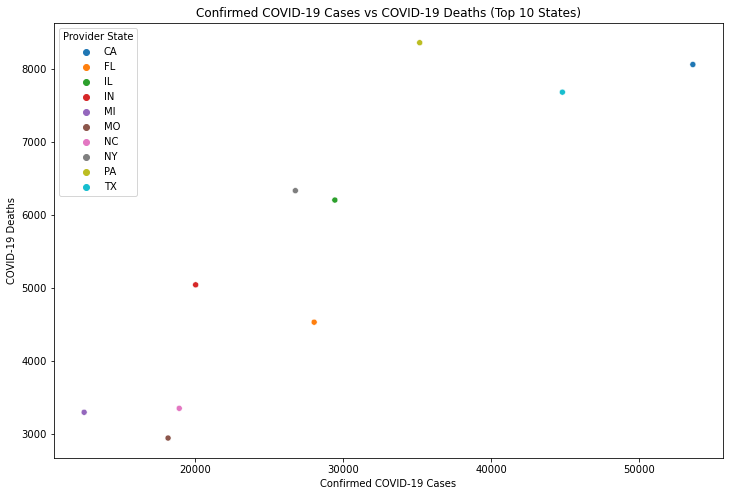

In [21]:
plt.figure(figsize=(12, 8))
plt.title('Confirmed COVID-19 Cases vs COVID-19 Deaths (Top 10 States)')
plt.ylabel('COVID-19 Deaths')
plt.xlabel('Confirmed COVID-19 Cases')
sns.scatterplot(
    data=df_by_state.loc[df_by_state['Provider State'].isin(top_states)],
    x='Residents Weekly Confirmed COVID-19',
    y='Residents Weekly COVID-19 Deaths',
    hue='Provider State'
);

# Choropleths

In [22]:
# Grouping by state, week ending
df_by_state = df.groupby(by=['Provider State', 'Week Ending']).sum()

# Resetting index
df_by_state = df_by_state.reset_index()

# Setting 'Week Ending' back to str (for plotly graphs)
df_by_state['Week Ending'] = df_by_state['Week Ending'].astype(str)

In [23]:
fig = px.choropleth(
    df_by_state,
    locations='Provider State',
    locationmode='USA-states',
    color='Residents Weekly Admissions COVID-19',
    color_continuous_scale='Portland',
    animation_frame='Week Ending',
    range_color=(0, 500)
)

fig.update_layout(
    title='Residents Weekly Admissions COVID-19',
    margin={"r":0,"t":25,"l":0,"b":0},
    coloraxis_colorbar=dict(title="")
)

fig.update_geos(scope="usa", visible=True)

In [24]:
fig = px.choropleth(
    df_by_state,
    locations='Provider State',
    locationmode='USA-states',
    color='Residents Weekly Confirmed COVID-19',
    color_continuous_scale='Portland',
    animation_frame='Week Ending',
    range_color=(0, 500)
)

fig.update_layout(
    title='Residents Weekly Confirmed COVID-19',
    margin={"r":0,"t":25,"l":0,"b":0},
    coloraxis_colorbar=dict(title="")
)

fig.update_geos(scope="usa", visible=True)

In [25]:
fig = px.choropleth(
    df_by_state,
    locations='Provider State',
    locationmode='USA-states',
    color='Residents Weekly COVID-19 Deaths',
    color_continuous_scale='Portland',
    animation_frame='Week Ending',
    range_color=(0, 500)
)

fig.update_layout(
    title='Residents Weekly COVID-19 Deaths',
    margin={"r":0,"t":25,"l":0,"b":0},
    coloraxis_colorbar=dict(title="")
)

fig.update_geos(scope="usa", visible=True)

In [26]:
def plot_choropleth_binary_data(col):
    """
    Plots choropleth using binary data in df. 
    """

    temp = df.groupby(by=['Provider State', 'Week Ending']).agg(['sum', 'count'])
    temp = temp[col]
    temp = temp.reset_index()
    temp['Percentage'] = temp['sum']/temp['count']
    temp['Week Ending'] = temp['Week Ending'].astype(str)
    
    fig = px.choropleth(
    temp,
    locations='Provider State',
    locationmode='USA-states',
    color='Percentage',
    color_continuous_scale='Portland',
    animation_frame='Week Ending',
    range_color=(0, 0.5)
    )

    fig.update_layout(
        title=col,
        margin={"r":0,"t":25,"l":0,"b":0},
        coloraxis_colorbar=dict(title="")
    )

    fig.update_geos(scope="usa", visible=True)
    
    return fig

In [27]:
fig = plot_choropleth_binary_data('Shortage of Nursing Staff')
fig

In [28]:
fig = plot_choropleth_binary_data('Shortage of Aides')
fig

In [29]:
fig = plot_choropleth_binary_data('Shortage of Other Staff')
fig

# Bubble Maps

In [30]:
# Grouping by geolocation, week ending, and provider number
df_by_provider = df.groupby(by=['Geolocation', 'Week Ending', 'Federal Provider Number']).sum()
df_by_provider = df_by_provider.reset_index()

# Setting 'Week Ending' back to str (for plotly graphs)
df_by_provider['Week Ending'] = df_by_provider['Week Ending'].astype(str)

# Sorting values by 'Week Ending' (for plotly graphs)
df_by_provider = df_by_provider.sort_values(by='Week Ending', ascending=True)

In [31]:
# Getting lattittudes and longitudes from 'Geolocation' column
def get_lattitude(geolocation):
    pointRegex = re.compile(r'-?[0-9]+.[0-9]+')
    return float(pointRegex.findall(geolocation)[0])

def get_longitude(geolocation):
    pointRegex = re.compile(r'-?[0-9]+.[0-9]+')
    return float(pointRegex.findall(geolocation)[1])

df_by_provider['lat'] = df_by_provider['Geolocation'].apply(get_lattitude)
df_by_provider['long'] = df_by_provider['Geolocation'].apply(get_longitude)

In [32]:
fig = px.scatter_geo(
    # Filtering by Admissions > 10 for performance purposes
    df_by_provider.loc[df_by_provider['Residents Weekly Admissions COVID-19'] > 10],
    lat = 'long',
    lon = 'lat',
    locationmode='USA-states',
    hover_name='Federal Provider Number',
    size = 'Residents Weekly Admissions COVID-19',
    animation_frame='Week Ending'
    # center = {"lat":37, "lon":-121}
)

fig.update_layout(
    title='Residents Weekly Admissions COVID-19',
    margin={"r":0,"t":25,"l":0,"b":0}
)

fig.update_geos(scope="usa", visible=True) # projection_scale=2

In [33]:
fig = px.scatter_geo(
    # Filtering by Admissions > 10 for performance purposes
    df_by_provider.loc[df_by_provider['Residents Weekly Confirmed COVID-19'] > 10],
    lat = 'long',
    lon = 'lat',
    locationmode='USA-states',
    hover_name='Federal Provider Number',
    size = 'Residents Weekly Confirmed COVID-19',
    animation_frame='Week Ending'
)

fig.update_layout(
    title='Residents Weekly Confirmed COVID-19',
    margin={"r":0,"t":25,"l":0,"b":0}
)

fig.update_geos(scope="usa", visible=True)

In [34]:
fig = px.scatter_geo(
    # Filtering by Admissions > 10 for performance purposes
    df_by_provider.loc[df_by_provider['Residents Weekly COVID-19 Deaths'] > 10],
    lat = 'long',
    lon = 'lat',
    locationmode='USA-states',
    hover_name='Federal Provider Number',
    size = 'Residents Weekly COVID-19 Deaths',
    animation_frame='Week Ending'
)

fig.update_layout(
    title='Residents Weekly COVID-19 Deaths',
    margin={"r":0,"t":25,"l":0,"b":0}
)

fig.update_geos(scope="usa", visible=True)

# Line Graphs (National)

In [35]:
# Grouping by week
df_timeseries = df.groupby(by='Week Ending').sum()

# Percent Beds Occupied
df_timeseries['Percent Beds Occupied'] = df_timeseries['Total Number of Occupied Beds']/df_timeseries['Number of All Beds']

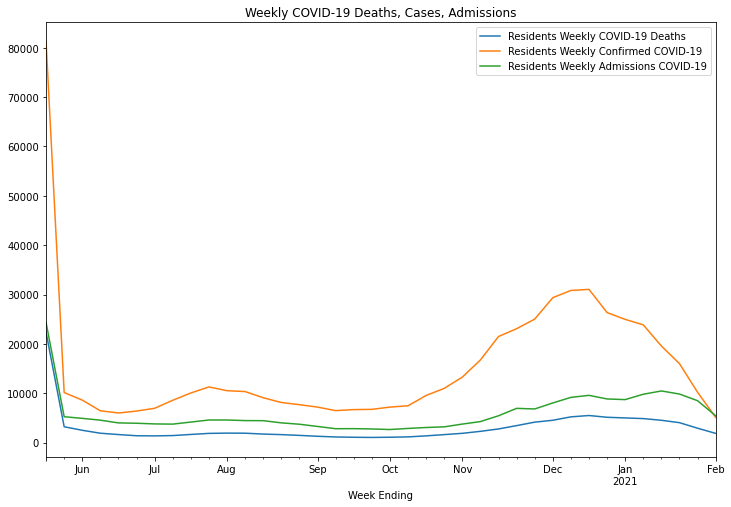

In [36]:
plt.figure(figsize=(12, 8))
plt.title('Weekly COVID-19 Deaths, Cases, Admissions')
ax = df_timeseries['Residents Weekly COVID-19 Deaths'].plot()
ax = df_timeseries['Residents Weekly Confirmed COVID-19'].plot()
ax = df_timeseries['Residents Weekly Admissions COVID-19'].plot()
plt.legend();

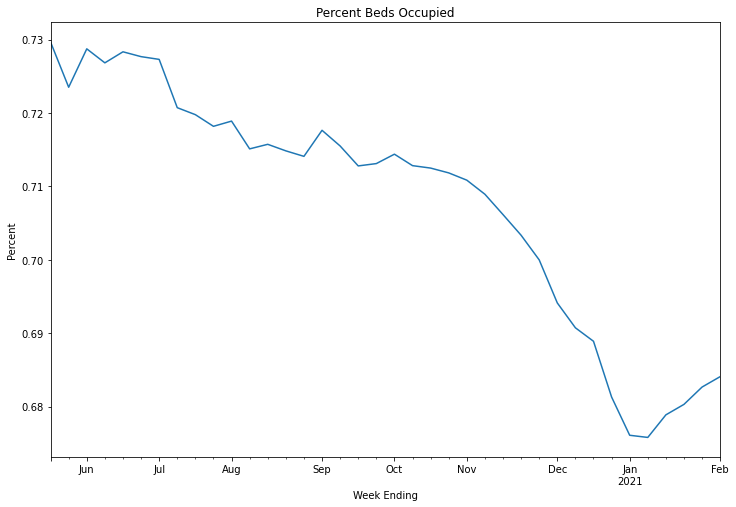

In [37]:
plt.figure(figsize=(12, 8))
plt.title('Percent Beds Occupied')
plt.ylabel('Percent')
ax = df_timeseries['Percent Beds Occupied'].plot();

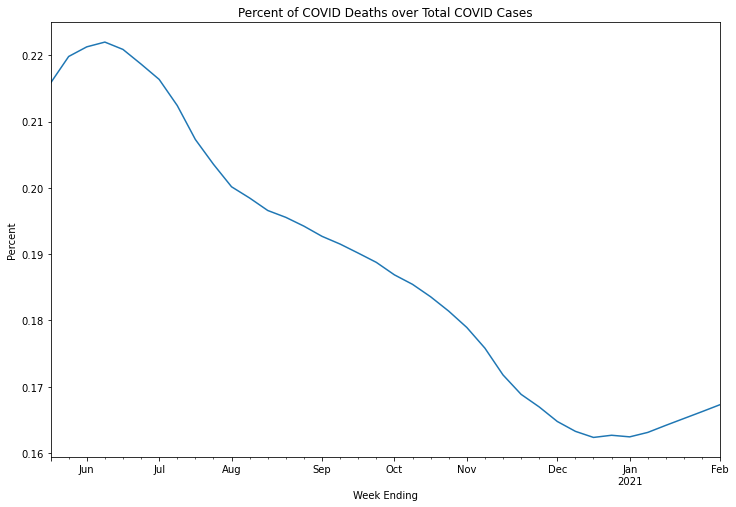

In [38]:
df_timeseries['Percent of COVID Deaths over Total COVID Cases'] = df_timeseries['Residents Total COVID-19 Deaths']\
/(df_timeseries['Residents Total COVID-19 Deaths']+df_timeseries['Residents Total Confirmed COVID-19'])

plt.figure(figsize=(12, 8))
plt.title('Percent of COVID Deaths over Total COVID Cases')
plt.ylabel('Percent')
df_timeseries['Percent of COVID Deaths over Total COVID Cases'].plot();

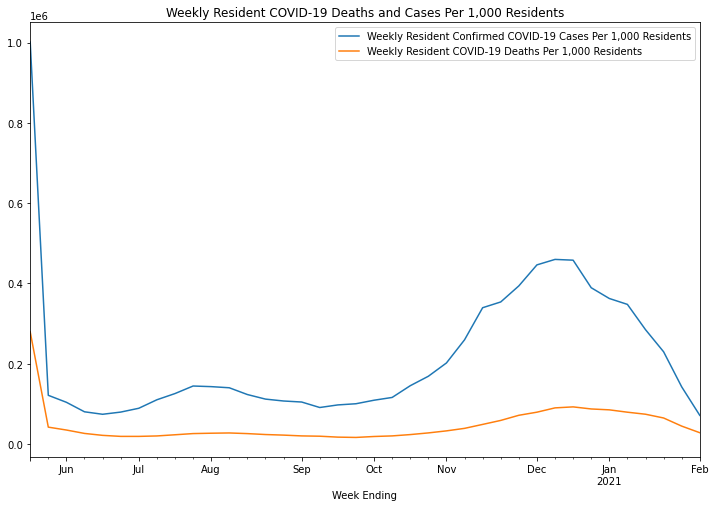

In [39]:
plt.figure(figsize=(12, 8))
plt.title('Weekly Resident COVID-19 Deaths and Cases Per 1,000 Residents')
df_timeseries['Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents'].plot()
df_timeseries['Weekly Resident COVID-19 Deaths Per 1,000 Residents'].plot()
L = plt.legend()

L.get_texts()[0].set_text('Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents');
L.get_texts()[1].set_text('Weekly Resident COVID-19 Deaths Per 1,000 Residents')

# Line Graphs (Top 10 States)

In [40]:
df_timeseries_by_state = df.groupby(by=['Provider State', 'Week Ending']).sum()
df_timeseries_by_state = df_timeseries_by_state.reset_index()

df_timeseries_by_state['Percent Beds Occupied'] =\
df_timeseries_by_state['Total Number of Occupied Beds']/df_timeseries_by_state['Number of All Beds']

df_timeseries_by_state['Percent of COVID Deaths over Total COVID Cases'] = \
df_timeseries_by_state['Residents Total COVID-19 Deaths']/\
(df_timeseries_by_state['Residents Total COVID-19 Deaths']+df_timeseries_by_state['Residents Total Confirmed COVID-19'])

In [41]:
df_timeseries_by_state.set_index('Week Ending', inplace=True)

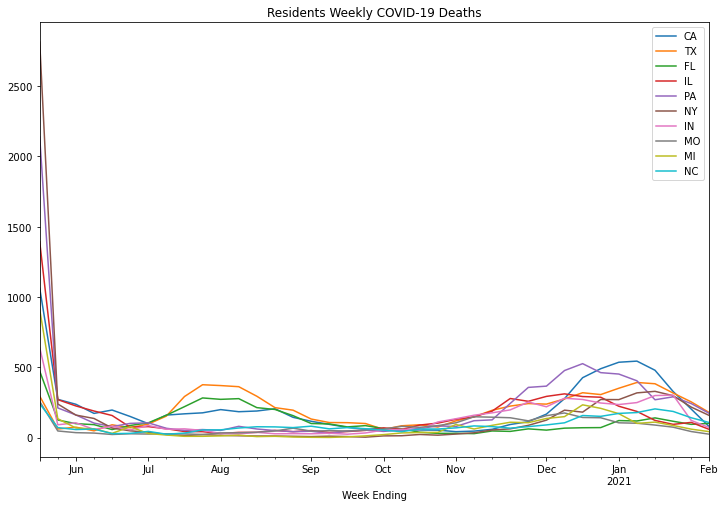

In [42]:
plt.figure(figsize=(12, 8))
plt.title('Residents Weekly COVID-19 Deaths')
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
for state in top_states:
    df_timeseries_by_state.loc[df_timeseries_by_state['Provider State'] == state, 'Residents Weekly COVID-19 Deaths'].plot()
L = plt.legend()

for i, state in enumerate(top_states):
    L.get_texts()[i].set_text(state)

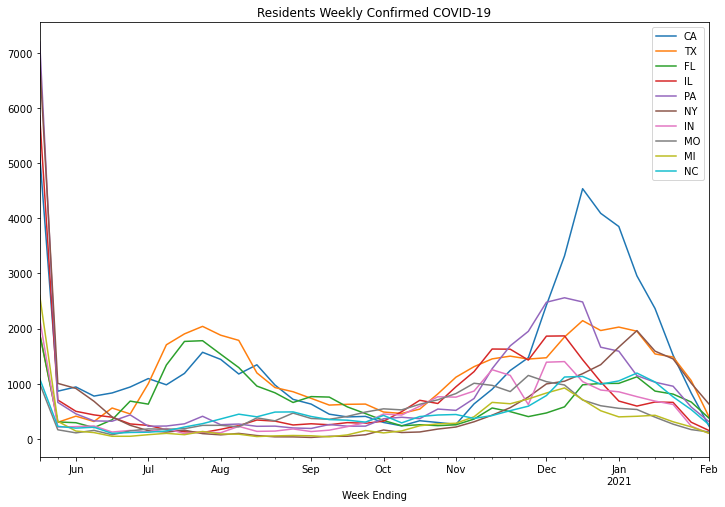

In [43]:
plt.figure(figsize=(12, 8))
plt.title('Residents Weekly Confirmed COVID-19')
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
for state in top_states:
    df_timeseries_by_state.loc[df_timeseries_by_state['Provider State'] == state, 'Residents Weekly Confirmed COVID-19'].plot()
L = plt.legend()

for i, state in enumerate(top_states):
    L.get_texts()[i].set_text(state)

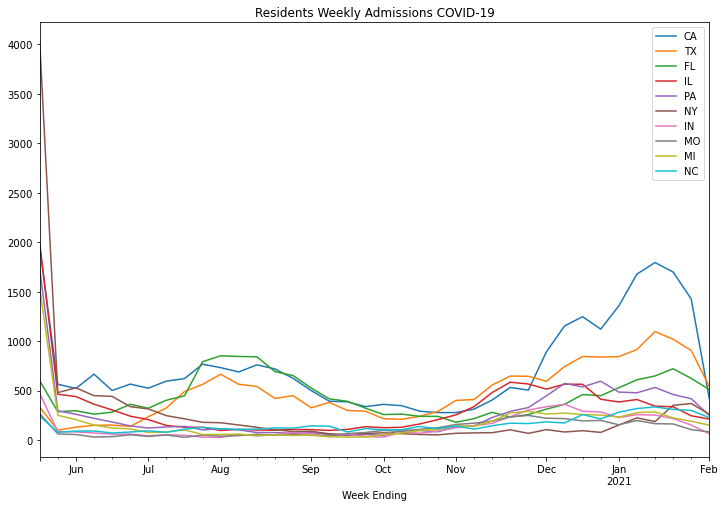

In [44]:
plt.figure(figsize=(12, 8))
plt.title('Residents Weekly Admissions COVID-19')
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
for state in top_states:
    df_timeseries_by_state.loc[df_timeseries_by_state['Provider State'] == state, 'Residents Weekly Admissions COVID-19'].plot()
L = plt.legend()

for i, state in enumerate(top_states):
    L.get_texts()[i].set_text(state)

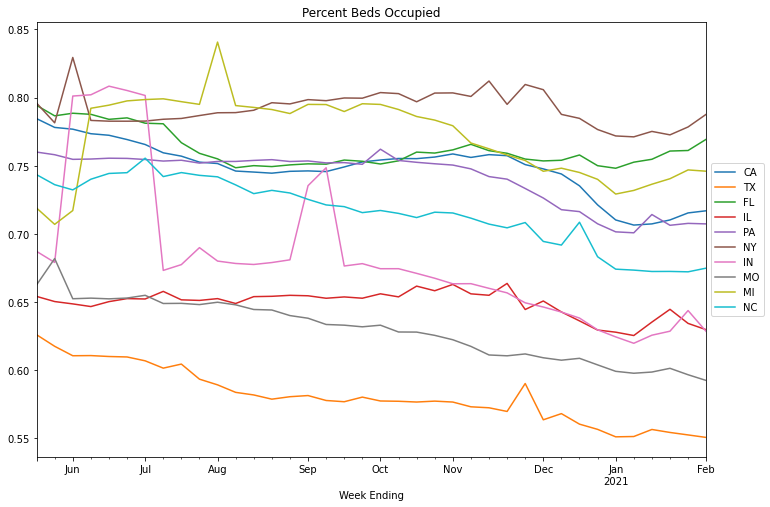

In [45]:
plt.figure(figsize=(12, 8))
plt.title('Percent Beds Occupied')
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
for state in top_states:
    df_timeseries_by_state.loc[df_timeseries_by_state['Provider State'] == state, 'Percent Beds Occupied'].plot()
L = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for i, state in enumerate(top_states):
    L.get_texts()[i].set_text(state)

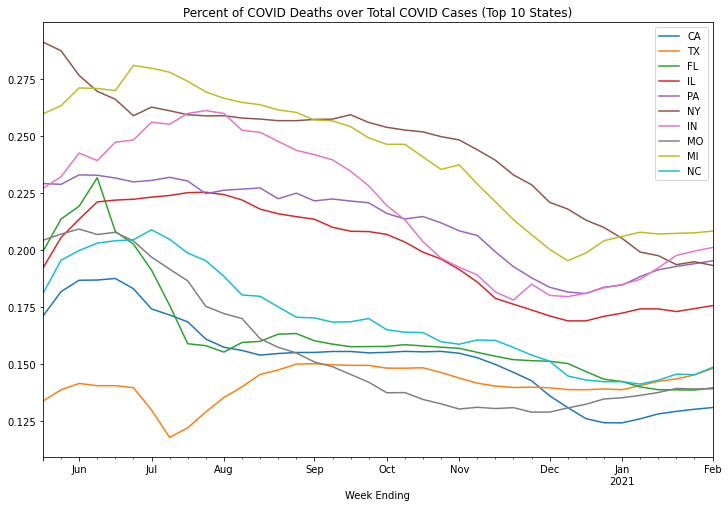

In [46]:
plt.figure(figsize=(12, 8))
plt.title('Percent of COVID Deaths over Total COVID Cases (Top 10 States)')
top_states = ['CA', 'TX', 'FL', 'IL', 'PA', 'NY', 'IN', 'MO', 'MI', 'NC']
for state in top_states:
    df_timeseries_by_state.loc[df_timeseries_by_state['Provider State'] == state, 'Percent of COVID Deaths over Total COVID Cases'].plot()
L = plt.legend()

for i, state in enumerate(top_states):
    L.get_texts()[i].set_text(state)